#### 1. Import the necessary libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### 2. Read the data as a data frame

In [3]:
insurance = pd.read_csv('insurance.csv')

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### 3. a. Shape of the data

In [5]:
insurance.shape

(1338, 7)

#### b. Data type of each attribute

In [7]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### c. Checking the presence of missing values

In [9]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### d. 5 point summary of numerical attributes

In [16]:
insurance.describe().iloc[3:]

,age,bmi,children,charges
min,18.0,15.96000,0.0,1121.873900
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515
max,64.0,53.13000,5.0,63770.428010


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

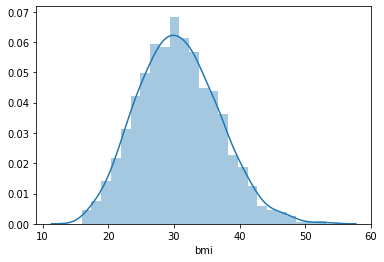

In [30]:
sns.distplot(insurance['bmi'])

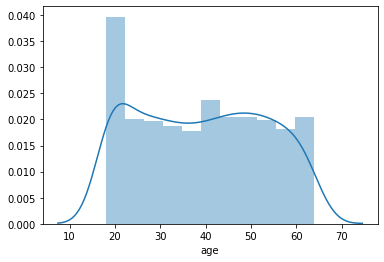

In [18]:
sns.distplot(insurance['age'])

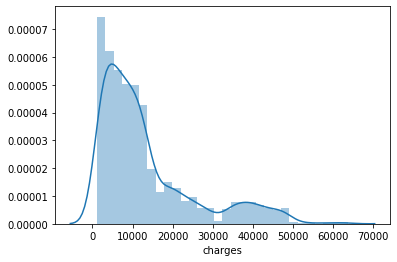

In [19]:
sns.distplot(insurance['charges'])

#### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [21]:
from scipy.stats import skew

In [67]:
print('Skewness of bmi = ',skew(insurance['bmi'],bias=False))

Skewness of bmi =  0.28404711059874477


In [68]:
print('Skewness of age = ',skew(insurance['age'],bias=False))

Skewness of age =  0.055672515652991854


In [69]:
print('Skewness of charges = ',skew(insurance['charges'],bias=False))

Skewness of charges =  1.5158796580240383


#### g. Checking the presence of outliers in ‘bmi’, ‘age’ and charges columns

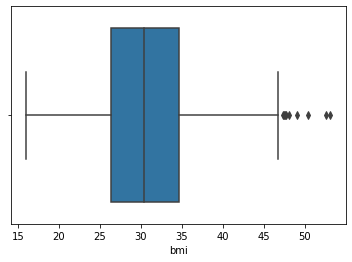

In [26]:
sns.boxplot(insurance['bmi'])

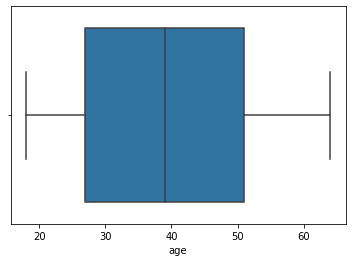

In [36]:
sns.boxplot(insurance['age'])

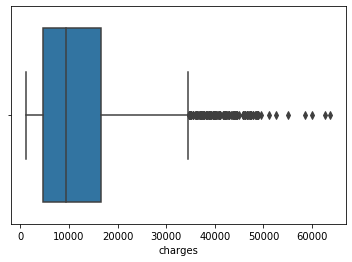

In [37]:
sns.boxplot(insurance['charges'])

#### h. Distribution of categorical columns (include children)

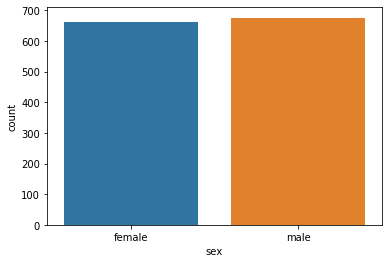

In [39]:
sns.countplot(insurance['sex'])

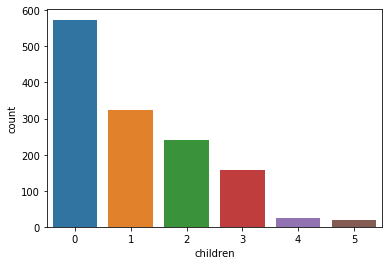

In [40]:
sns.countplot(insurance['children'])

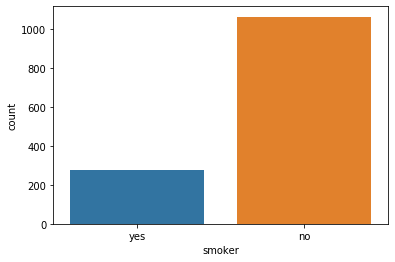

In [41]:
sns.countplot(insurance['smoker'])

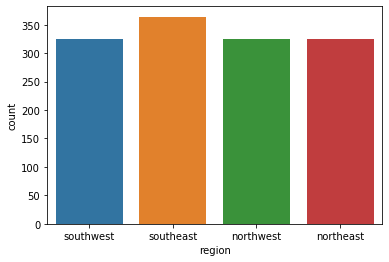

In [42]:
sns.countplot(insurance['region'])

#### i. Pair plot that includes all the columns of the dataframe

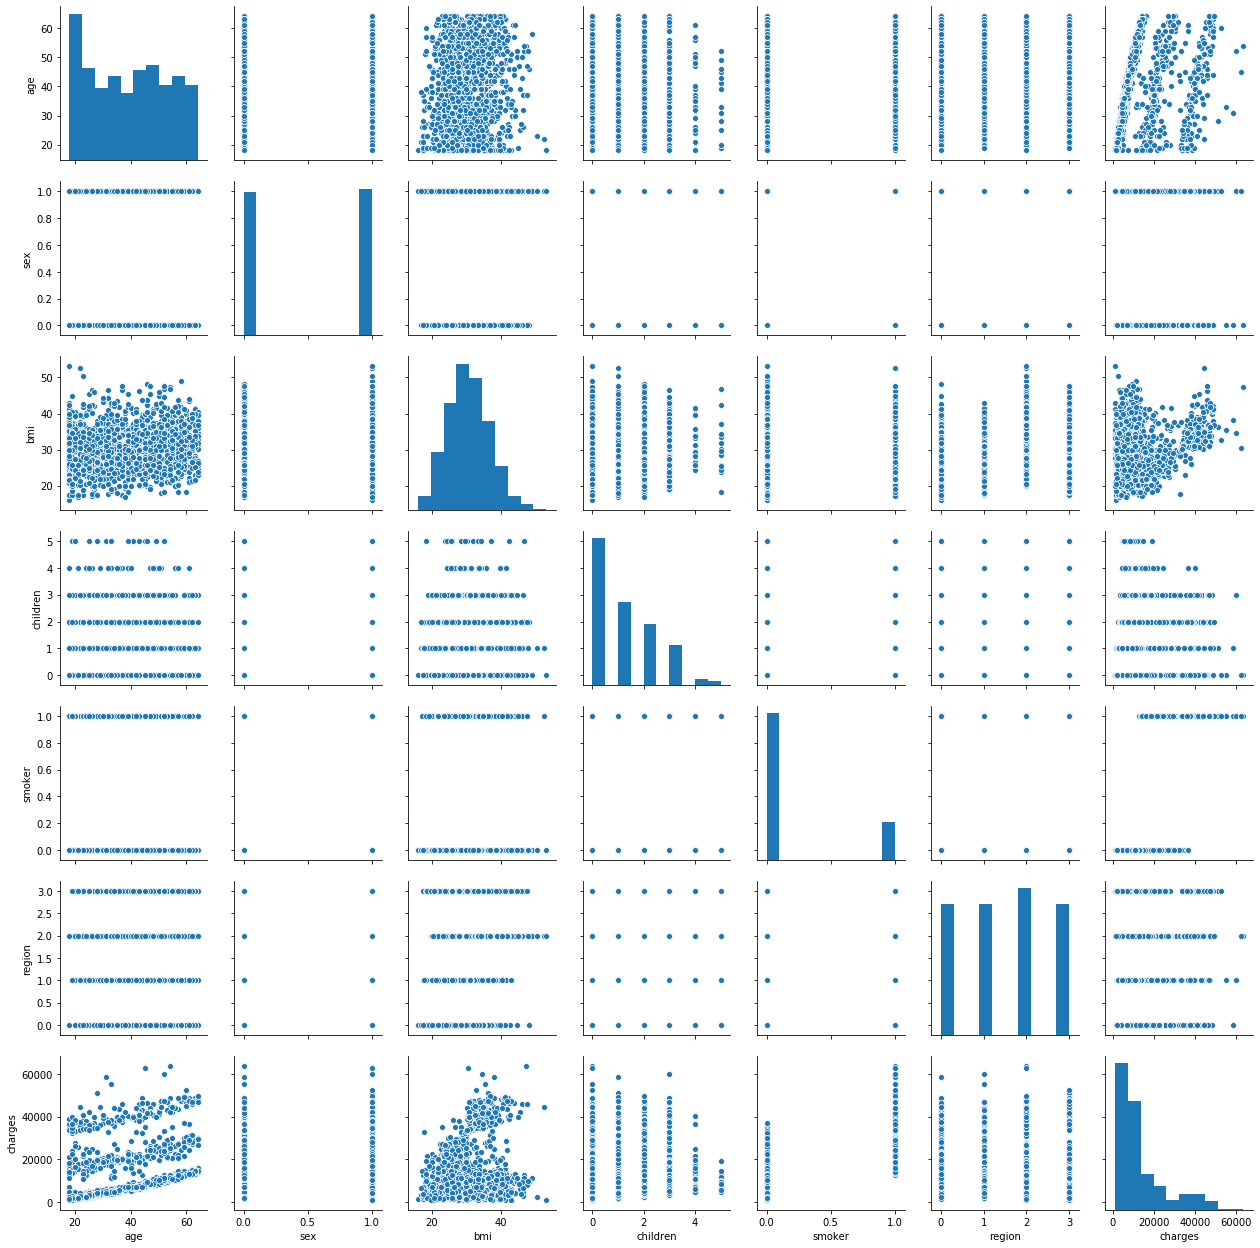

In [66]:
from sklearn.preprocessing import LabelEncoder
insurance_encoded = insurance.copy()
insurance_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform)
sns.pairplot(insurance_encoded)

### 4.a. Do charges of people who smoke differ significantly from the people who don't?

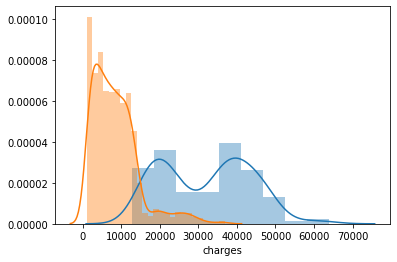

In [45]:
sns.distplot(insurance[insurance['smoker']=='yes']['charges'])
sns.distplot(insurance[insurance['smoker']=='no']['charges'])

#### Ho = "Charges of smoker and non smoker are same" (NULL)
#### Ha = "Charges of smoker and non-smoker are not the same"(Alternate)

In [48]:
t_statistic, p_value  =  stats.ttest_ind(insurance[insurance['smoker']=='yes']['charges'],insurance[insurance['smoker']=='no']['charges'])
print('t_statistic :',t_statistic)
print('p_value :',p_value)

t_statistic : 46.664921172723716
p_value : 8.271435842177219e-283


##### Since p value < 0.05 we can reject NULL hypothesis.
##### statistically we infer that there is significant difference in charges between smokers and not smokers

### b. Does bmi of males differ significantly from that of females?

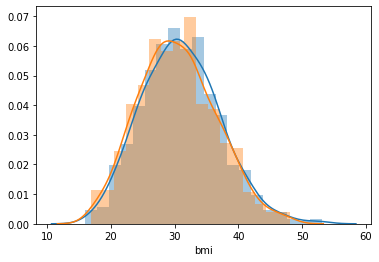

In [49]:
sns.distplot(insurance[insurance['sex']=='male']['bmi'])
sns.distplot(insurance[insurance['sex']=='female']['bmi'])

#### Ho = "Gender has no effect on bmi" (NULL)
#### Ha = "Gender has an effect on bmi" (Alternate)

In [50]:
t_statistic, p_value  =  stats.ttest_ind(insurance[insurance['sex']=='male']['bmi'],insurance[insurance['sex']=='female']['bmi'])
print('t_statistic :',t_statistic)
print('p_value :',p_value)

t_statistic : 1.696752635752224
p_value : 0.08997637178984932


##### Since p value > 0.05 we fail to reject NULL hypothesis.
##### statistically we infer that there is no significant difference in bmi between females and males

### c. Is the proportion of smokers significantly differentin different genders?

##### Ho = "Gender has no effect on smoking habits"   (NULL)
##### Ha = "Gender has an effect on smoking habits" (Alternate)

In [55]:
contingencyTab = pd.crosstab(insurance['sex'],insurance['smoker'])
contingencyTab

smoker,no,yes
sex,,
female,547,115
male,517,159


In [56]:
chi, p_value, dof, expected =  stats.chi2_contingency(contingencyTab)
p_value

0.006548143503580696

##### since P value < 0.05 we can reject NULL hypothesis 
##### statistically we can infer that Gender has an effect on smoking habits

### d. Is the distribution of bmi across women with nochildren, one child and two children, the same ?

##### Ho = "No. of children has no effect on bmi" (NULL)
##### Ha = "No. of children has an effect on bmi" (Alternate)

In [61]:
female_df = insurance[insurance['sex']=='female']

In [62]:
zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']

In [63]:
f_stat, p_value = stats.f_oneway(zero,one,two)
print('statistic :',f_stat)
print('p_value :',p_value)

statistic : 0.3344720147757968
p_value : 0.7158579926754841


##### Since P value > 0.05 we fail to reject NULL hypothesis 
##### Statistically we can infer that No. of children has no impact on bmi of women